# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [24]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
chipo = pd.read_csv(url, sep = '\t')

### Step 4. See the first 10 entries

In [25]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

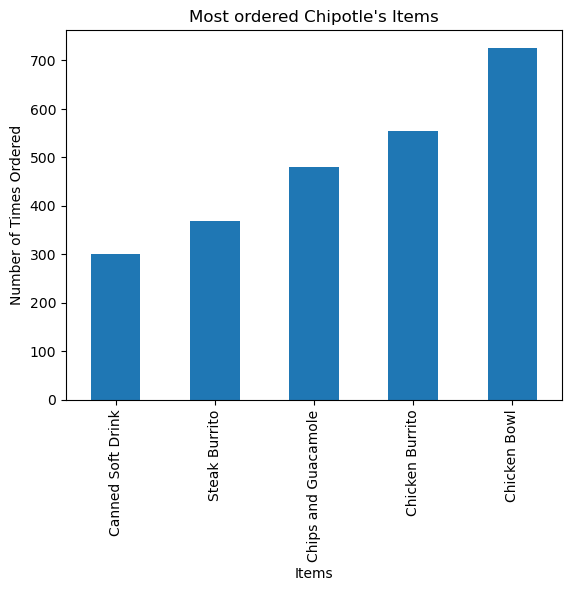

In [26]:
x = chipo.item_name

letter_counts = Counter(x)

df = pd.DataFrame.from_dict(letter_counts, orient='index')

df = df[0].sort_values(ascending = True)[45:50]

df.plot(kind='bar')

plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items')

plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

(0.0, 36.7)

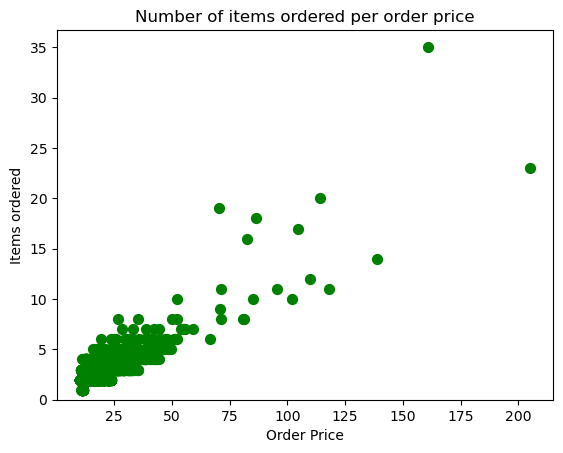

In [27]:
chipo.item_price = [float(value[1:-1]) for value in chipo.item_price] 

orders = chipo.groupby('order_id').sum()

plt.scatter(x = orders.item_price, y = orders.quantity, s = 50, c = 'green')

plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)

### Step 7. BONUS: Create a question and a graph to answer your own question.

Question:Create a bar chart of the last 5 items purchased

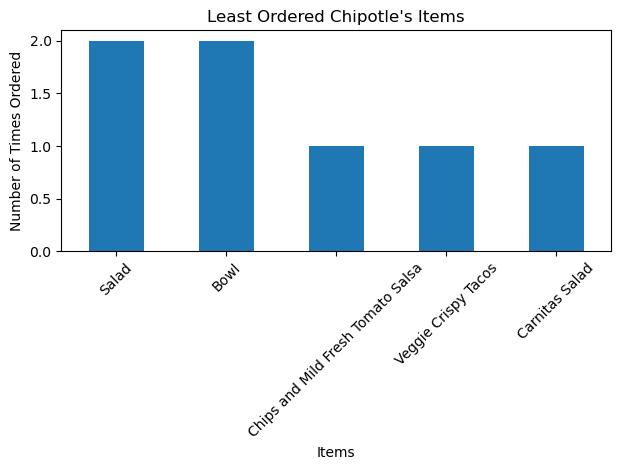

In [31]:
item_counts = chipo['item_name'].value_counts()

df = pd.DataFrame(item_counts).iloc[-5:] 

df.reset_index(inplace=True)
df.columns = ['item_name', 'Number of Times Ordered']

df.plot(kind='bar', x='item_name', y='Number of Times Ordered', legend=False)
plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Least Ordered Chipotle\'s Items')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()
